## Problem Statement:

The business problem we are addressing is related to the fashion industry, where accurate classification of clothing items is crucial for inventory management, trend analysis, and customer satisfaction. Automating the classification process can save time and reduce errors compared to manual tagging.

## Data Exploration
Data Exploration:

Dataset Characteristics: The Fashion MNIST dataset consists of 60,000 training images and 10,000 test images. Each image is 28x28 pixels in grayscale.
Data Quality Issues: We will check for any missing or corrupt images, although this dataset is known to be clean.
Sampling/Balancing: The dataset is balanced, with an equal number of images per class.
Evaluation Metrics: We will use accuracy as the primary evaluation metric, but we will also consider precision, recall, and F1-score.

4422102/4422102 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


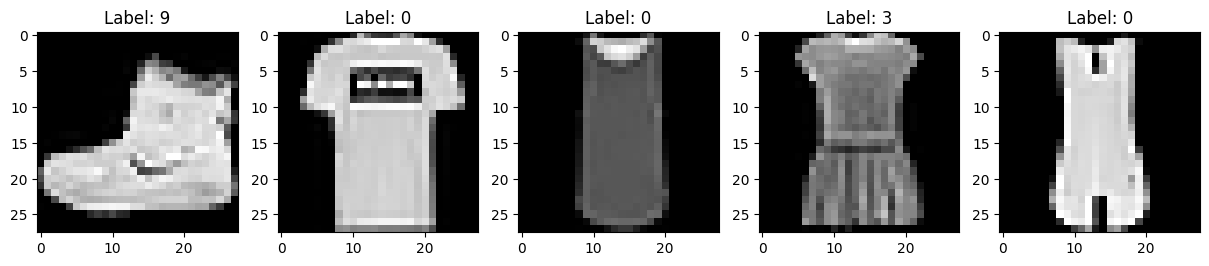

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
plt.show()


##Data Preprocessing and Feature Engineering
Data Preprocessing:

Normalize the pixel values to the range [0, 1].
Reshape the images to a format suitable for neural network input.

In [ ]:

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"Training set shape: {x_train.shape}")
print(f"Validation set shape: {x_val.shape}")
print(f"Test set shape: {x_test.shape}")


Training set shape: (48000, 28, 28, 1)
Validation set shape: (12000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)


## Model Training
Model Training:

We will train a convolutional neural network (CNN) as it is well-suited for image data.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(input_shape, learning_rate=0.001):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


input_shape = (28, 28, 1)
model = build_model(input_shape)

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=32, verbose=1)


Epoch 1/20
1500/1500 [==============================] - 59s 38ms/step - loss: 0.6588 - accuracy: 0.7542 - val_loss: 0.4120 - val_accuracy: 0.8499
Epoch 2/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.4540 - accuracy: 0.8337 - val_loss: 0.3521 - val_accuracy: 0.8707
Epoch 3/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.3959 - accuracy: 0.8575 - val_loss: 0.3055 - val_accuracy: 0.8867
Epoch 4/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.3624 - accuracy: 0.8687 - val_loss: 0.2913 - val_accuracy: 0.8917
Epoch 5/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.3430 - accuracy: 0.8748 - val_loss: 0.2740 - val_accuracy: 0.8977
Epoch 6/20
1500/1500 [==============================] - 64s 42ms/step - loss: 0.3258 - accuracy: 0.8811 - val_loss: 0.2658 - val_accuracy: 0.9008
Epoch 7/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.3151 - accuracy: 0.8843 - val_loss: 0.2652 -

## Experimental Section
Hyperparameter Tuning:

Manually change hyperparameters and record results.

In [ ]:

hyperparameters = [
    {'learning_rate': 0.001, 'batch_size': 32},
    {'learning_rate': 0.001, 'batch_size': 64},
    {'learning_rate': 0.0001, 'batch_size': 32},
    {'learning_rate': 0.0001, 'batch_size': 64},

]

results = []

for params in hyperparameters:
    model = build_model(input_shape, learning_rate=params['learning_rate'])
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=params['batch_size'], verbose=1)
    val_loss, val_accuracy = model.evaluate(x_val, y_val, verbose=0)

    results.append({
        'learning_rate': params['learning_rate'],
        'batch_size': params['batch_size'],
        'val_accuracy': val_accuracy
    })

results_df = pd.DataFrame(results)
print(results_df)


Epoch 1/20
1500/1500 [==============================] - 64s 42ms/step - loss: 0.6450 - accuracy: 0.7634 - val_loss: 0.4293 - val_accuracy: 0.8444
Epoch 2/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.4476 - accuracy: 0.8368 - val_loss: 0.3382 - val_accuracy: 0.8733
Epoch 3/20
1500/1500 [==============================] - 60s 40ms/step - loss: 0.3933 - accuracy: 0.8579 - val_loss: 0.3185 - val_accuracy: 0.8794
Epoch 4/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.3606 - accuracy: 0.8699 - val_loss: 0.2873 - val_accuracy: 0.8937
Epoch 5/20
1500/1500 [==============================] - 62s 42ms/step - loss: 0.3428 - accuracy: 0.8750 - val_loss: 0.2859 - val_accuracy: 0.8923
Epoch 6/20
1500/1500 [==============================] - 61s 40ms/step - loss: 0.3254 - accuracy: 0.8822 - val_loss: 0.2645 - val_accuracy: 0.9035
Epoch 7/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.3122 - accuracy: 0.8854 - val_loss: 0.2669 -

## Model Assessment
Evaluate the final model on the test set:

In [ ]:

best_params = results_df.loc[results_df['val_accuracy'].idxmax()]
best_model = build_model(input_shape, learning_rate=best_params['learning_rate'])

best_batch_size = int(best_params['batch_size'])
history = best_model.fit(x_train, y_train, validation_data=(x_val, y_val),
                        epochs=20, batch_size=best_batch_size, verbose=1)


test_loss, test_accuracy = best_model.evaluate(x_test, y_test, verbose=1)
print(f'Best Model Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/20
1500/1500 [==============================] - 66s 41ms/step - loss: 0.6580 - accuracy: 0.7608 - val_loss: 0.4303 - val_accuracy: 0.8429
Epoch 2/20
1500/1500 [==============================] - 60s 40ms/step - loss: 0.4516 - accuracy: 0.8359 - val_loss: 0.3511 - val_accuracy: 0.8704
Epoch 3/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.3908 - accuracy: 0.8572 - val_loss: 0.3054 - val_accuracy: 0.8890
Epoch 4/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.3600 - accuracy: 0.8682 - val_loss: 0.2868 - val_accuracy: 0.8916
Epoch 5/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.3386 - accuracy: 0.8758 - val_loss: 0.2806 - val_accuracy: 0.8945
Epoch 6/20
1500/1500 [==============================] - 61s 40ms/step - loss: 0.3255 - accuracy: 0.8806 - val_loss: 0.2968 - val_accuracy: 0.8870
Epoch 7/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.3115 - accuracy: 0.8871 - val_loss: 0.2824 -